In [2]:
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import os
import warnings
import harmonypy as hm

warnings.filterwarnings('ignore')

sc.set_figure_params(figsize=(8, 8), dpi=80, dpi_save=600)

In [3]:
adata = sc.read_h5ad('data/selected_samples.h5ad')

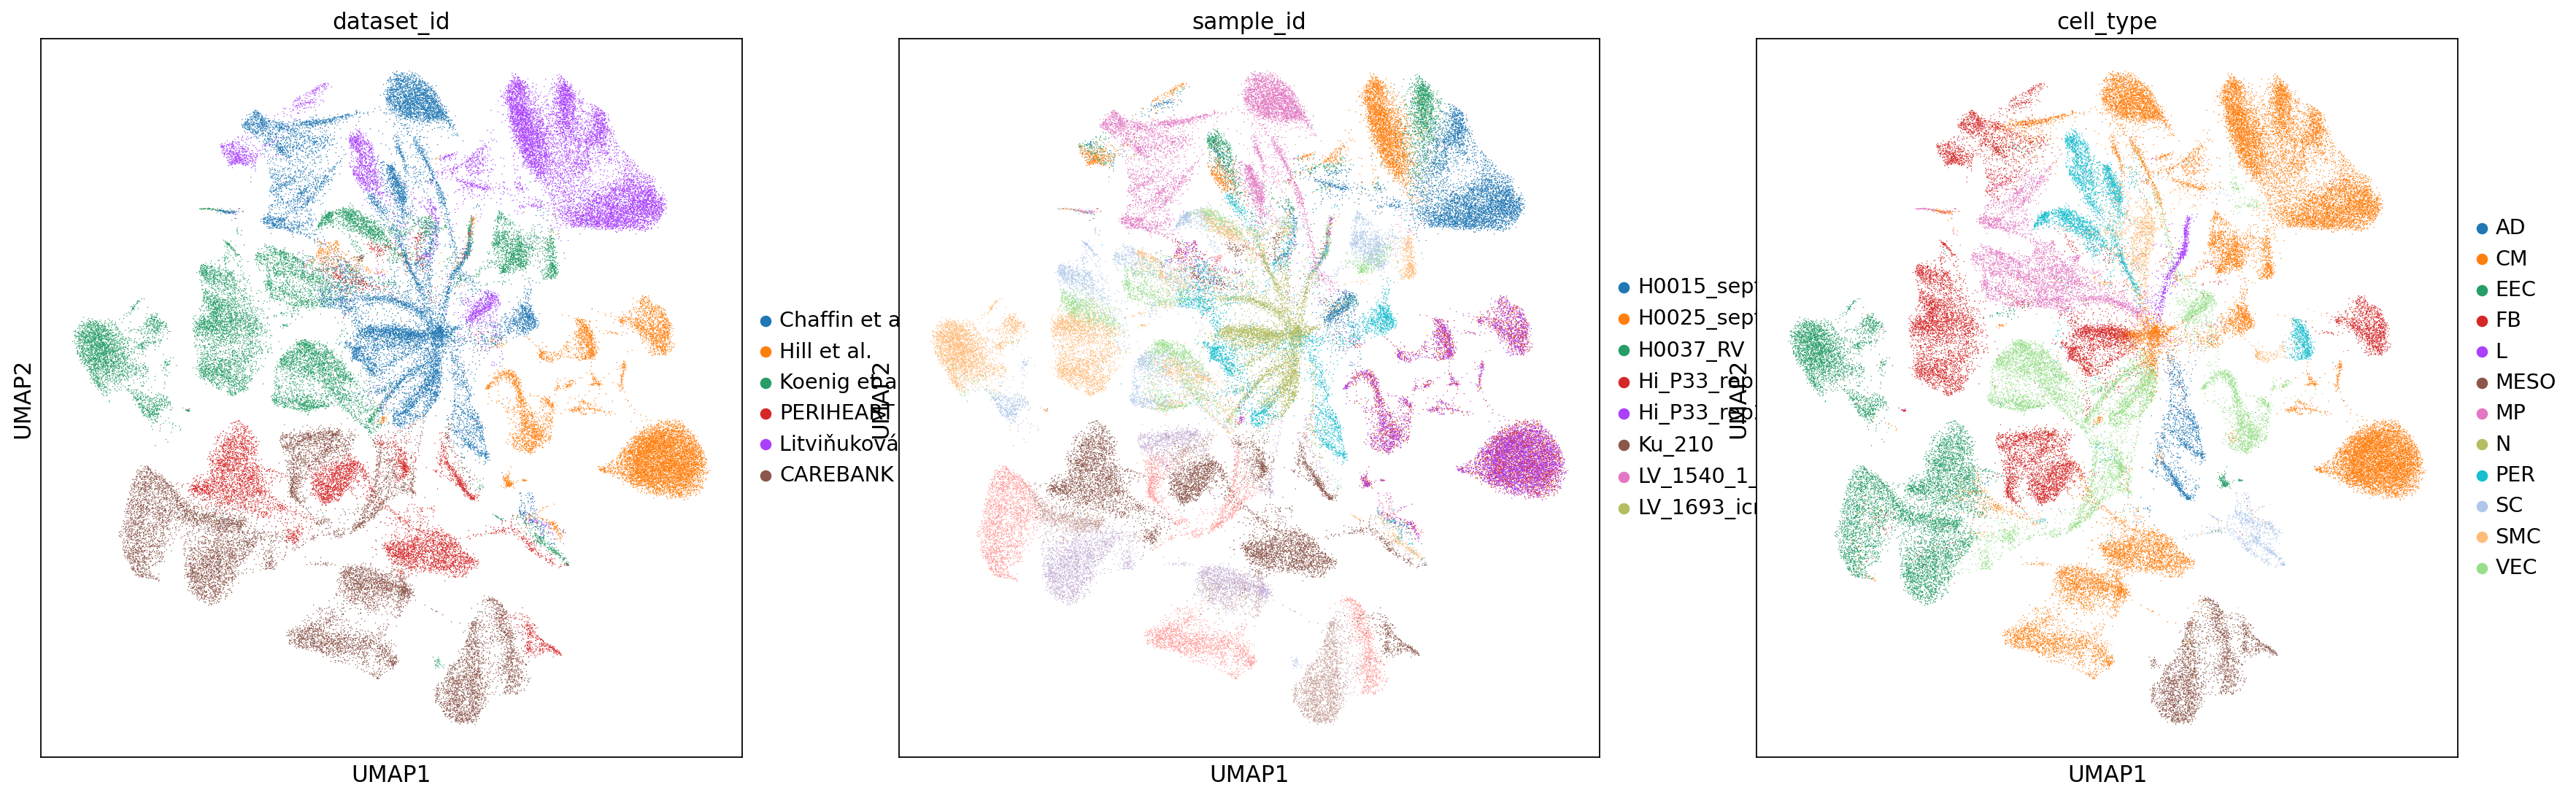

In [4]:
sc.pl.umap(adata, color=['dataset_id', 'sample_id', 'cell_type'], save='_selectedsamples_before_integration.png')

In [5]:
ho = hm.run_harmony(adata.obsm['X_pca'], adata.obs, "sample_id")
adata.obsm['X_pca'] = ho.Z_corr.T

sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

2024-05-29 08:19:32,113 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-05-29 08:19:44,318 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-05-29 08:19:44,660 - harmonypy - INFO - Iteration 1 of 10
2024-05-29 08:20:09,503 - harmonypy - INFO - Iteration 2 of 10
2024-05-29 08:20:32,416 - harmonypy - INFO - Iteration 3 of 10
2024-05-29 08:20:55,031 - harmonypy - INFO - Iteration 4 of 10
2024-05-29 08:21:18,018 - harmonypy - INFO - Iteration 5 of 10
2024-05-29 08:21:31,957 - harmonypy - INFO - Converged after 5 iterations


In [ ]:
sc.pl.umap(adata, color=['dataset_id', 'sample_id', 'cell_type'], save='_selectedsamples_harmony.png')

In [ ]:
adata.write('data/harmony_adata.h5ad')